In [128]:
from IPython.display import Image, display
from IPython.display import clear_output
import random
import time
import pygame

# Initialize pygame mixer
pygame.mixer.init()

# Load sound
horror = pygame.mixer.Sound("horror.mp3")
horror.set_volume(0.1)
unlock_sound = pygame.mixer.Sound("key_in_lock.mp3")
unlock_sound.set_volume(0.5)
unlock_base = pygame.mixer.Sound("key_basement.mp3")
unlock_base.set_volume(0.5)
sound_map = pygame.mixer.Sound("sound_map.mp3")
sound_map.set_volume(0.1)
sound_paper = pygame.mixer.Sound("sound_paper.mp3")
sound_paper.set_volume(0.2)
safe_open = pygame.mixer.Sound("safe_open.mp3")
safe_open.set_volume(0.5)
outside_sound = pygame.mixer.Sound("outside.mp3")
outside_sound.set_volume(0.2)


In [ ]:
rooms = {
    'Red Room': {
        'description': 'A dimly lit room bathed in a reddish glow. Not everything is as it seems… look closer.',
        'connections': ['Library', 'Dining Room'],
        'items': {
            'Copper key': {'name': "Copper key", "description": "A small copper key", "collect": True, "hidden": True},
            'Glasses': {'name': "Glasses", "description": "Reveal hidden items", "collect": True, "hidden": False},
            'Map': {'name': "Map", "description": "A worn-out world map with country names faintly visible. It looks old, as if it has been used many times before. \nThere might be something important on it...", "collect": False, "hidden": True}
        }, 
        'image': 'red_room.png'
    },
    'Library': {
        'description': 'An old library filled with ancient books and cobwebs. A cold draft hints at hidden secrets.',
        'connections': ['Red Room', 'Study'],
        'items': {
            'Book': {'name': "Book", "description": "A brown leather book", "collect": True, "hidden": False}
        },
        'image': 'library.png'
    },
    'Dining Room': {
        'description': 'A rustic dining room with a grand wooden table set for a feast.  As if waiting for long-forgotten guests to return...',
        'connections': ['Red Room', 'Kitchen'],
        'items': {
            'Photo': {'name': "Photo", "description": "A family photo", "collect": True, "hidden": False}
        },
        'image': 'dining_room.png'
    },
    'Kitchen': {
        'description': 'An old-fashioned kitchen with vintage appliances. Pots and pans hang from the ceiling, swaying ever so slightly.',
        'connections': ['Dining Room', 'Basement'],
        'items': {
            'Lamp': {"name": "Lamp", "description": "Makes light to see hidden items.", "collect": True, "hidden": False}
        },
        'image': 'kitchen.png'
    },
    'Study': {
        'description': 'A small study with a cluttered desk covered in old papers, notes, and mysterious objects.',
        'connections': ['Library'],
        'items': {
            "Typewriter": {"name": "Typewriter", "description": "An old typewriter with a blank sheet of paper in it.", "collect": False, "hidden": False},
            "Paper": {"name": "Paper", "description": "There is something written on the paper...", "collect": True, "hidden": False},
            "Safe": {"name": "Safe", "description": "A locked safe with a combination lock.", "collect": False, "hidden": False}
        },
        'image': 'study.png'
    },
    'Basement': {
        'description': 'A damp, dark basement with cold stone walls. A hidden passage lies somewhere, guarding the final clue.',
        'connections': ['Kitchen', 'Outside'],
        'items': {
            'Ladder': {"name": "Ladder", "description": "Use it to get out of here!", "collect": True, "hidden": True}
        },
        'image': 'basement.png'
    },
    'Outside': {
        'description': 'You have successfully escaped the mansion!',
        'connections': [],
        'items': {},
        'image': 'outside.png'
    }

}


class Room:
    def __init__(self, name, description, image=None):
        self.name = name
        self.description = description
        self.connections = {}
        self.items = []
        self.locked = False
        self.image = image

    def connect(self, room, locked=False):
        self.connections[room.name.lower()] = room
        room.connections[self.name.lower()] = self
        if locked:
            room.locked = True

class Item:
    def __init__(self, name, description, collect, hidden):
        self.name = name
        self.description = description
        self.collect = collect  # True if it can be picked up, False otherwise
        self.hidden = hidden  # True if it can't be seen unless you use an item that reveals it
    

class Country:
    def __init__(self, name, capital,continent):
        self.name = name
        self.capital = capital
        self.continent = continent

# List of country objects with name and capital and continent
countries = [
    Country("France", "Paris", "Europe"), Country("Germany", "Berlin", "Europe"),
    Country("Spain", "Madrid", "Europe"), Country("Italy", "Rome", "Europe"),
    Country("United Kingdom", "London", "Europe"), Country("Russia", "Moscow", "Europe"),
    Country("Turkey", "Ankara", "Europe"), Country("Ukraine", "Kyiv", "Europe"),
    Country("Poland", "Warsaw", "Europe"), Country("Romania", "Bucharest", "Europe"),
    Country("Netherlands", "Amsterdam", "Europe"), Country("Belgium", "Brussels", "Europe"),
    Country("Czech Republic", "Prague", "Europe"), Country("Greece", "Athens", "Europe"),
    Country("Portugal", "Lisbon", "Europe"), Country("Sweden", "Stockholm", "Europe"),
    Country("Hungary", "Budapest", "Europe"), Country("Belarus", "Minsk", "Europe"),
    Country("Austria", "Vienna", "Europe"), Country("Serbia", "Belgrade", "Europe"),
    Country("Switzerland", "Bern", "Europe"), Country("Bulgaria", "Sofia", "Europe"),
    Country("Denmark", "Copenhagen", "Europe"), Country("Finland", "Helsinki", "Europe"),
    Country("Slovakia", "Bratislava", "Europe"), Country("Norway", "Oslo", "Europe"),
    Country("Ireland", "Dublin", "Europe"), Country("Croatia", "Zagreb", "Europe"),
    Country("Moldova", "Chisinau", "Europe"), Country("Bosnia and Herzegovina", "Sarajevo", "Europe"),
    Country("Albania", "Tirana", "Europe"), Country("Lithuania", "Vilnius", "Europe"),
    Country("North Macedonia", "Skopje", "Europe"), Country("Slovenia", "Ljubljana", "Europe"),
    Country("Latvia", "Riga", "Europe"), Country("Estonia", "Tallinn", "Europe"),
    Country("Montenegro", "Podgorica", "Europe"), Country("Luxembourg", "Luxembourg", "Europe"),
    Country("Malta", "Valletta", "Europe"), Country("Iceland", "Reykjavik", "Europe"),
    Country("Andorra", "Andorra la Vella", "Europe"), Country("Liechtenstein", "Vaduz", "Europe"),
    Country("Monaco", "Monaco", "Europe"), Country("San Marino", "San Marino", "Europe"),
    Country("Vatican City", "Vatican City", "Europe"), Country("United States", "Washington", "North America"),
    Country("Canada", "Ottawa", "North America"), Country("Mexico", "Mexico City", "North America"),
    Country("Guatemala", "Guatemala City", "North America"), Country("Belize", "Belmopan", "North America"),
    Country("El Salvador", "San Salvador", "North America"), Country("Honduras", "Tegucigalpa", "North America"),
    Country("Nicaragua", "Managua", "North America"), Country("Costa Rica", "San Jose", "North America"),
    Country("Panama", "Panama City", "North America"), Country("Cuba", "Havana", "North America"),
    Country("Jamaica", "Kingston", "North America"), Country("Haiti", "Port-au-Prince", "North America"),
    Country("Dominican Republic", "Santo Domingo", "North America"), Country("Puerto Rico", "San Juan", "North America"),
    Country("Bahamas", "Nassau", "North America"), Country("Barbados", "Bridgetown", "North America"),
    Country("Trinidad and Tobago", "Port of Spain", "North America"), Country("Saint Kitts and Nevis", "Basseterre", "North America"),
    Country("Antigua and Barbuda", "Saint John's", "North America"), Country("Saint Lucia", "Castries", "North America"),
    Country("Saint Vincent and the Grenadines", "Kingstown", "North America"), Country("Grenada", "St. George's", "North America"),
    Country("Dominica", "Roseau", "North America"), Country("Saint Martin", "Marigot", "North America"),
    Country("Sint Maarten", "Philipsburg", "North America"), Country("Saint Barthelemy", "Gustavia", "North America"),
    Country("Aruba", "Oranjestad", "North America"), Country("Curacao", "Willemstad", "North America"),
    Country("Bonaire", "Kralendijk", "North America"), Country("Cayman Islands", "George Town", "North America"),
    Country("Turks and Caicos Islands", "Cockburn Town", "North America"), Country("British Virgin Islands", "Road Town", "North America"),
    Country("US Virgin Islands", "Charlotte Amalie", "North America"), Country("Anguilla", "The Valley", "North America"),
    Country("Montserrat", "Plymouth", "North America"), Country("Guadeloupe", "Basse-Terre", "North America"),
    Country("Martinique", "Fort-de-France", "North America"), Country("Saint Pierre and Miquelon", "Saint-Pierre", "North America"),
    Country("Greenland", "Nuuk", "North America"), Country("Saint Helena", "Jamestown", "Africa"),
    Country("Ascension Island", "Georgetown", "Africa"), Country("Tristan da Cunha", "Edinburgh of the Seven Seas", "Africa"),
    Country("Algeria", "Algiers", "Africa"), Country("Angola", "Luanda", "Africa"),
    Country("Benin", "Porto-Novo", "Africa"), Country("Botswana", "Gaborone", "Africa"),
    Country("Burkina Faso", "Ouagadougou", "Africa"), Country("Burundi", "Gitega", "Africa"),
    Country("Cabo Verde", "Praia", "Africa"), Country("Cameroon", "Yaounde", "Africa"),
    Country("Central African Republic", "Bangui", "Africa"), Country("Chad", "N'Djamena", "Africa"),
    Country("Comoros", "Moroni", "Africa"), Country("Congo", "Brazzaville", "Africa"),
    Country("Djibouti", "Djibouti", "Africa"), Country("Egypt", "Cairo", "Africa"),
    Country("Equatorial Guinea", "Malabo", "Africa"), Country("Eritrea", "Asmara", "Africa"),
    Country("Eswatini", "Mbabane", "Africa"), Country("Ethiopia", "Addis Ababa", "Africa"),
    Country("Gabon", "Libreville", "Africa"), Country("Gambia", "Banjul", "Africa"),
    Country("Ghana", "Accra", "Africa"), Country("Guinea", "Conakry", "Africa"),
    Country("Guinea-Bissau", "Bissau", "Africa"), Country("Ivory Coast", "Yamoussoukro", "Africa"),
    Country("Kenya", "Nairobi", "Africa"), Country("Lesotho", "Maseru", "Africa"),
    Country("Liberia", "Monrovia", "Africa"), Country("Libya", "Tripoli", "Africa"),
    Country("Madagascar", "Antananarivo", "Africa"), Country("Malawi", "Lilongwe", "Africa"),
    Country("Mali", "Bamako", "Africa"), Country("Mauritania", "Nouakchott", "Africa"),
    Country("Mauritius", "Port Louis", "Africa"), Country("Morocco", "Rabat", "Africa"),
    Country("Mozambique", "Maputo", "Africa"), Country("Namibia", "Windhoek", "Africa"),
    Country("Niger", "Niamey", "Africa"), Country("Nigeria", "Abuja", "Africa"),
    Country("Rwanda", "Kigali", "Africa"), Country("Sao Tome and Principe", "Sao Tome", "Africa"),
    Country("Senegal", "Dakar", "Africa"), Country("Seychelles", "Victoria", "Africa"),
    Country("Sierra Leone", "Freetown", "Africa"), Country("Somalia", "Mogadishu", "Africa"),
    Country("South Africa", "Pretoria", "Africa"), Country("South Sudan", "Juba", "Africa"),
    Country("Sudan", "Khartoum", "Africa"), Country("Tanzania", "Dodoma", "Africa"),
    Country("Togo", "Lome", "Africa"), Country("Tunisia", "Tunis", "Africa"),
    Country("Uganda", "Kampala", "Africa"), Country("Zambia", "Lusaka", "Africa"),
    Country("Zimbabwe", "Harare", "Africa"), Country("Afghanistan", "Kabul", "Asia"),
    Country("Armenia", "Yerevan", "Asia"), Country("Azerbaijan", "Baku", "Asia"),
    Country("Bahrain", "Manama", "Asia"), Country("Bangladesh", "Dhaka", "Asia"),
    Country("Bhutan", "Thimphu", "Asia"), Country("Brunei", "Bandar Seri Begawan", "Asia"),
    Country("Cambodia", "Phnom Penh", "Asia"), Country("China", "Beijing", "Asia"),
    Country("Cyprus", "Nicosia", "Asia"), Country("Georgia", "Tbilisi", "Asia"),
    Country("India", "New Delhi", "Asia"), Country("Indonesia", "Jakarta", "Asia"),
    Country("Iran", "Tehran", "Asia"), Country("Iraq", "Baghdad", "Asia"),
    Country("Wales", "Cardiff", "Europe"), Country("Scotland", "Edinburgh", "Europe"),
    Country("Northern Ireland", "Belfast", "Europe"), Country("Brazil", "Brasilia", "South America"),
    Country("Argentina", "Buenos Aires", "South America"), Country("Peru", "Lima", "South America"),
    Country("Colombia", "Bogota", "South America"), Country("Venezuela", "Caracas", "South America"),
    Country("Chile", "Santiago", "South America"), Country("Ecuador", "Quito", "South America"),
    Country("Bolivia", "La Paz", "South America"), Country("Paraguay", "Asuncion", "South America"),
    Country("Uruguay", "Montevideo", "South America"), Country("Guyana", "Georgetown", "South America"),
    Country("Suriname", "Paramaribo", "South America"), Country("French Guiana", "Cayenne", "South America"),
    Country("Falkland Islands", "Stanley", "South America"), Country("Australia", "Canberra", "Oceania"),
    Country("Papua New Guinea", "Port Moresby", "Oceania"), Country("New Zealand", "Wellington", "Oceania"),
    Country("Fiji", "Suva", "Oceania"), Country("Solomon Islands", "Honiara", "Oceania"),
    Country("Vanuatu", "Port Vila", "Oceania"), Country("Samoa", "Apia", "Oceania"),
    Country("Kiribati", "Tarawa", "Oceania"), Country("Tonga", "Nuku'alofa", "Oceania"),
    Country("Micronesia", "Palikir", "Oceania"), Country("Marshall Islands", "Majuro", "Oceania"),
    Country("Palau", "Ngerulmud", "Oceania"), Country("Tuvalu", "Funafuti", "Oceania"),
    Country("Nauru", "Yaren", "Oceania"), Country("Cook Islands", "Avarua", "Oceania"),
    Country("Niue", "Alofi", "Oceania"), Country("Tokelau", "Atafu", "Oceania"),
    Country("American Samoa", "Pago Pago", "Oceania"), Country("Guam", "Hagatna", "Oceania"),
    Country("Northern Mariana Islands", "Saipan", "Oceania"), Country("Hong Kong", "Hong Kong", "Asia"),
    Country("Macau", "Macau", "Asia"), Country("Taiwan", "Taipei", "Asia"),
    Country("Japan", "Tokyo", "Asia"), Country("Jordan", "Amman", "Asia"),
    Country("Kazakhstan", "Nur-Sultan", "Asia"), Country("Kuwait", "Kuwait City", "Asia"),
    Country("Kyrgyzstan", "Bishkek", "Asia"), Country("Laos", "Vientiane", "Asia"),
    Country("Lebanon", "Beirut", "Asia"), Country("Malaysia", "Kuala Lumpur", "Asia"),
]

def ask_country():
    """Ask the player a country-based question when collecting the map."""
    chosen_country = random.choice(countries)
    
    first_letter = chosen_country.name[0]
    last_letter = chosen_country.name[-1]
    num_words = len(chosen_country.name.split())

    length = len(chosen_country.name)

    print(f"\nTo collect the map, answer this:")
    print(f"Which country name starts with '{first_letter}', ends with '{last_letter}', has {num_words} words  and has {length} letters?\nIs in {chosen_country.continent.upper()}.")
    answer = input("Your answer: ").strip()

    if answer.lower() == chosen_country.name.lower():
        print(f"Correct! The country is {chosen_country.name} in {chosen_country.continent}. The capital is {chosen_country.capital}. You have successfully collected the map.")
        print("Turning the map over, you find a list of countries:\nGermany,\nSpain,\nItaly,\nFrance.")
        return True  
    else:
        print(f"Wrong! The correct answer was {chosen_country.name}. The capital is {chosen_country.capital}.")
        return False  # They fail to get the map

def play_footstep():
    # Initialize footstep sounds
    footsteps = [pygame.mixer.Sound(f"foot{i}.mp3") for i in range(1, 8)]
    for sound in footsteps:
        sound.set_volume(0.1)
        sound.play()
        time.sleep(0.8)  # Delay between each sound

class Player:
    def __init__(self, start_room):
        self.current_room = start_room
        self.inventory = []
    
    def move(self, room_name):
        room_name = room_name.lower().strip()
        if room_name in self.current_room.connections:
            next_room = self.current_room.connections[room_name]
            if next_room.locked:
                print(f"The door to {next_room.name} is locked. You need a key.")
            else:
                clear_output(wait=True)
                self.current_room = next_room
                # Show room image
                display(Image(filename=next_room.image, width=500, height=500))
                print(f"You move to {next_room.name}. {self.current_room.description}")
                if self.current_room.name == "Basement":
                    play_footstep()  # Play footstep sounds
                if self.current_room.name == "Outside":
                    outside_sound.play()  # Play sound effect
                print("You see exits to:", ', '.join([r.title() for r in self.current_room.connections.keys()]))
        else:
            print(f"You can't go that way. Available exits: {', '.join([r.title() for r in self.current_room.connections.keys()])}")


    def show_items(self):
        if not self.current_room.items:
            print("There are no items in this room.")
            return

        # Collect only visible items (hidden = False)
        visible_items = [f" - {item.name}: {item.description}" for item in self.current_room.items if not item.hidden]

        if visible_items:
            print("You see in this room:")
            print("\n".join(visible_items))
        else:
            print("There are no visible items in this room.")


    def collect(self, item_name):
        for item in self.current_room.items:
            if item.name.lower() == item_name.lower():
                if item.name.lower() == "book":
                    # Ask a riddle before allowing collection
                    riddle_question = "We build words, take different shapes, and fill books so you can read a story. What are we?"
                    print(f"\nTo collect the book, answer this:")
                    print(riddle_question)
                    answer = input(f"Your answer: ").strip().lower()
                    
                    if answer.lower() == "letters":
                        print("Correct! You receive a Gold Key!")
                        gold_key = Item("Gold Key", "A shiny golden key. It looks important.", collect=True, hidden=False)
                        self.inventory.append(gold_key)
                    else:
                        print("Wrong answer! The book remains in place.")
                    return 
                if item.name.lower() == "paper":
                    sound_paper.play()  # Play sound effect
                    print("You read on it: 'Names hold numbers within. A safe bet is to count.'")
                    return
                
                if item.name.lower() == "safe":
                    # Ask a code before allowing collection
                    print(f"\nTo open the safe, enter the code:")
                    code = input("Enter the code: ").strip()

                    if code == "7556":
                        print("The safe clicks open! Inside, you find a black key.")
                        safe_open.play()  # Play sound effect
                        black_key = Item("Black Key", "A black key. Which door can it unlock?", collect=True, hidden=False)
                        self.inventory.append(black_key)
                    else:
                        print("The safe does not open. Maybe there's another clue?")
                    return
                    
                if item.name.lower() == "map":
                    if ask_country():
                        self.inventory.append(item)
                        self.current_room.items.remove(item)
                        print(f"You picked up {item.name}.")
                        sound_map.play()  # Play sound effect
                    else:
                        print("You failed the challenge. The map remains on the table.")
                    return   
                if item.name.lower() == "photo":
                    print("You see a photo of a family. They look happy.")
                    silver_key = Item("Silver Key", "A shiny silver key.", collect=True, hidden=False)
                    self.inventory.append(silver_key)
                    print("In the photo frame you find a Silver Key!")
                    return
                if item.collect:
                    self.inventory.append(item)
                    self.current_room.items.remove(item)
                    print(f"You picked up {item.name}.")
                else:
                    print(f"You can't collect {item.name}.")
                return
        print(f"There is no {item_name} here.")
    

    def use(self, item_name):
        for item in self.inventory:
            if item.name.lower() == item_name.lower():
                if item_name.lower() == "glasses" and self.current_room.name == "Red Room":
                    revealed_items = []
                    for item in self.current_room.items:
                        if item.hidden:
                            item.hidden = False
                            revealed_items.append(item.name)
                    if revealed_items:
                        print(f"You used the glasses and revealed: {', '.join(revealed_items)}.")
                    else:
                        print("There were no hidden items to reveal.")
                    return
                if item_name.lower() == "silver key" and "kitchen" in self.current_room.connections:
                    self.current_room.connections["kitchen"].locked = False
                    print("You unlocked the door to Kitchen!")
                    unlock_sound.play()  # Play sound effect
                    for item in self.inventory:
                        if item.name.lower() == "silver key":
                            self.inventory.remove(item)
                            break
                    return
                if item_name.lower() == "copper key" and "library" in self.current_room.connections:
                    self.current_room.connections["library"].locked = False
                    print("You unlocked the door to Library!")
                    unlock_sound.play()  # Play sound effect
                    for item in self.inventory:
                        if item.name.lower() == "copper key":
                            self.inventory.remove(item)
                            break
                    return
                if item_name.lower() == "gold key" and "dining room" in self.current_room.connections:
                    self.current_room.connections["dining room"].locked = False
                    print("You unlocked the door to Dining Room!")
                    unlock_sound.play()  # Play sound effect
                    for item in self.inventory:
                        if item.name.lower() == "gold key":
                            self.inventory.remove(item)
                            break
                    return
                if item_name.lower() == "black key" and "basement" in self.current_room.connections:
                    self.current_room.connections["basement"].locked = False
                    print("You unlocked the door to Basement!")
                    unlock_base.play()  # Play sound effect
                    for item in self.inventory:
                        if item.name.lower() == "black key":
                            self.inventory.remove(item)
                            break
                    return
                if item_name.lower() == "lamp" and self.current_room.name == "Basement":
                    for item in self.current_room.items:
                        if item.hidden:
                            item.hidden = False
                            display(Image(filename="basement2.png", width=500, height=500))
                            print(f"You used the lamp and revealed the {item.name}.")

                    # Find the ladder in the item list and reveal it
                    for item in self.current_room.items:
                        if item.name.lower() == "ladder":
                            item.hidden = False
                            return
                if item_name.lower() == "ladder" and "outside" in self.current_room.connections:
                    self.current_room.connections["outside"].locked = False
                    print("You climb the ladder and see the exit to freedom.")
                    return
                print("You can't use that here.")
                return
        print(f"You don't have {item_name}.")

# Create rooms
room_objects = {}

# Create Room instances and store them in room_objects
for room_name, room_data in rooms.items():
    room_objects[room_name] = Room(room_name, room_data['description'], room_data.get('image'))

# Connect rooms
for room_name, room_data in rooms.items():
    for connection in room_data['connections']:
        room_objects[room_name].connect(room_objects[connection])


# Add items to rooms
for room_name, room_data in rooms.items():
    if isinstance(room_data['items'], dict):
        for item_name, item_data in room_data['items'].items():
            item_obj = Item(item_data['name'], item_data['description'], item_data['collect'], item_data['hidden'])
            room_objects[room_name].items.append(item_obj)

# Assign room objects to variables
red_room = room_objects['Red Room']
library = room_objects['Library']
study = room_objects['Study']
dining_room = room_objects['Dining Room']
kitchen = room_objects['Kitchen']
basement = room_objects['Basement']
outside = room_objects['Outside']


# Lock specific rooms
red_room.connect(library, locked=True)  # Library starts locked
red_room.connect(dining_room, locked=True)  # Dining Room starts locked
dining_room.connect(kitchen, locked = True) # Kitchen starts locked
kitchen.connect(basement, locked=True)  # Basement starts locked
basement.connect(outside, locked=True)  # Basement starts locked


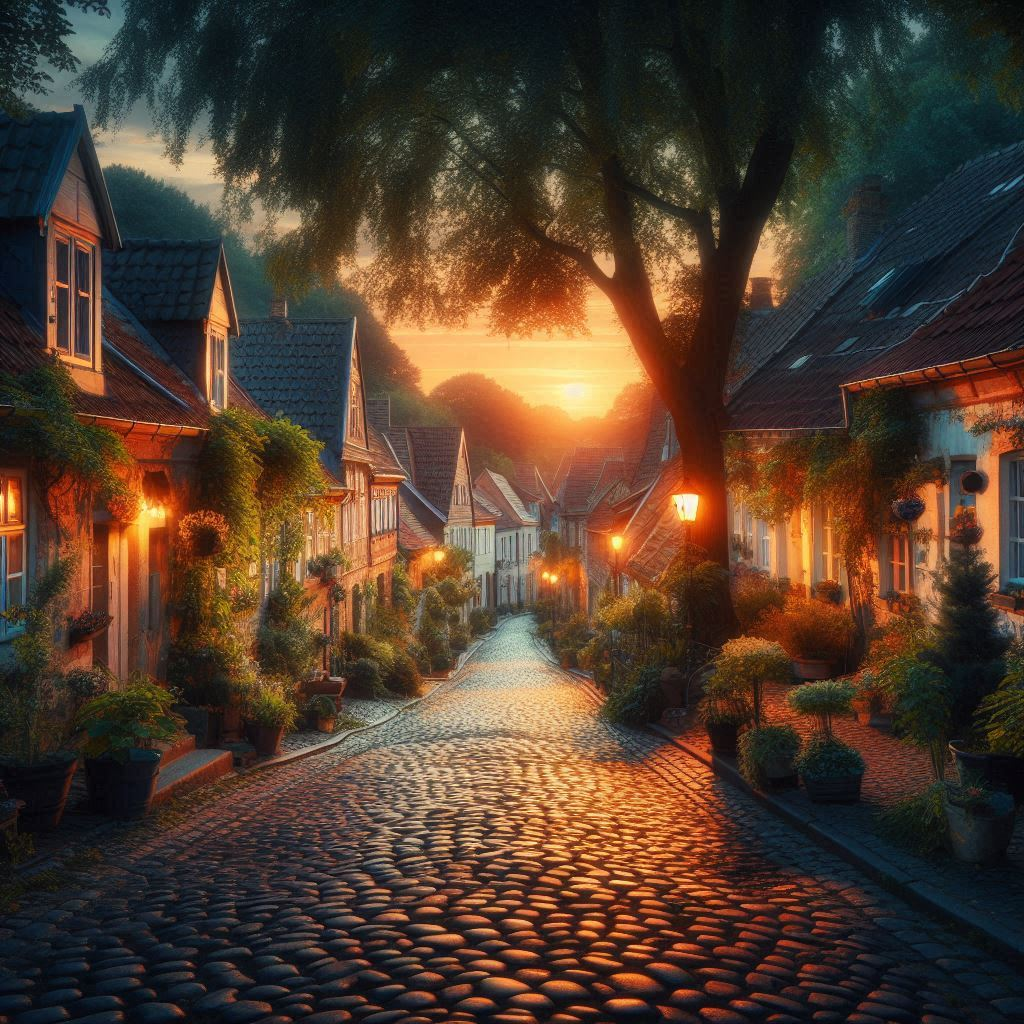

You move to Outside. You have successfully escaped the mansion!
You see exits to: Basement
Goodbye! CONGRATULATIONS!!!
Time spent in the game: 4 minutes and 33 seconds.


In [ ]:
# Start game
player = Player(red_room)
start_time = time.time()

# Game introduction
print("Welcome to the Escape Room Game!")
horror.play()  # Play sound effect

print("You find yourself trapped in an old abandoned mansion filled with hidden secrets and mysterious objects.\nExplore carefully, collect items, and find your way to escape.")
print("""INSTRUCTIONS: 
    - To move between rooms, type: \t 'go [room name]'. 
    - To see items in the room, type: \t 'show items'.
    - To collect an item, type: \t 'collect [item name]'. 
    - To use an item, type: \t 'use [item name]'.
    - To see available exits, type: \t 'dir'.
    - To see your inventory, type: \t 'inventory'.
    - To quit the game, type: \t 'quit'.\n
      """)
print("Good luck!\n")
# Show room image
display(Image(filename=red_room.image, width=500, height=500))
print(f"You are currently in {player.current_room.name}. {player.current_room.description}")
print("You see exits to:", ', '.join([r.title() for r in player.current_room.connections.keys()]))

# Game loop
while True:
    command = input("\nEnter command: (go [room], show items, collect [item], use [item], dir, inventory or quit): ").strip().lower()

    if command.startswith("go "):
        player.move(command[3:].strip())
    elif command == "show items":
        player.show_items()
    elif command.startswith("collect "):
        player.collect(command[8:].strip())
    elif command.startswith("use "):
        player.use(command[4:].strip())
    elif command == "dir":
        print("You see exits to:", ', '.join([r.title() for r in player.current_room.connections.keys()]))
    elif command == "inventory":
        if player.inventory:
            print("You have:")
            for item in player.inventory:
                print(f" - {item.name}: {item.description}")
        else:
            print("Your inventory is empty.")
    elif command == "quit":
        end_time = time.time()
        elapsed_time = end_time - start_time
        minutes = int(elapsed_time // 60)
        seconds = int(elapsed_time % 60)

        if player.current_room.name.lower() == "outside":
            print("Goodbye! CONGRATULATIONS!!!")
            pygame.time.delay(4000)  # Let the sound play for 4 seconds
            outside_sound.stop()
        else:
            print("Goodbye! Wishing you better luck next time!")

        print(f"Time spent in the game: {minutes} minutes and {seconds} seconds.")
        break
    else:
        print("Invalid command.")
        
